In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
font = {'family' : 'DejaVu Sans',
        'size'   : fs}
mpl.rc('font', **font)

In [2]:
np.log(2.7)

0.9932517730102834

In [15]:
# One species:
def LJP_1Species(ye,T):   # ALL IN ISO Units
    # Eq. (13):
    R = 8.31446261815324
    F = 96485.3321
    aln = 1.390; a0 = 1.158; a1 = -8.955; a2 = 164.7
    delta_U = R*T/F*(
        aln * np.log(ye) + a0 + a1*ye  + a2 * ye**2
    )
    return delta_U

Text(0.5, 0, 'ye')

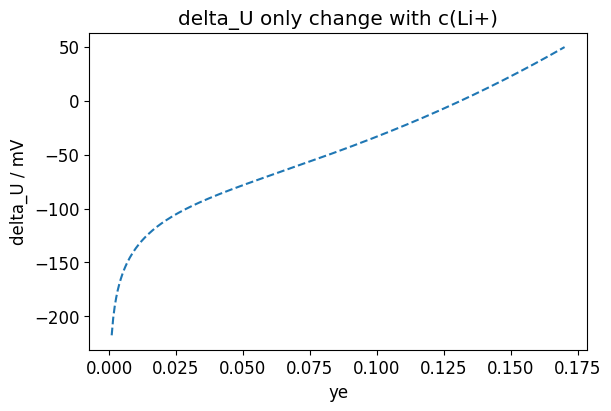

In [43]:
fs=12
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
Y_e = np.linspace(1E-3,0.17,300).tolist(); T=298.75
delta_U_1Species_1 = []; delta_U_1Species_2 = []; 
for ye in Y_e:
    delta_U_1Species_2.append(LJP_1Species(ye,T))
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.plot(Y_e,np.array(delta_U_1Species_2)*1e3,'--')
ax.set_ylabel("delta_U / mV")
ax.set_title("delta_U only change with c(Li+)")
ax.set_xlabel("ye")

In [41]:
# Try to define Taeho's pre-print liquid junction potential Eq. (17), which contains (14),(18),(19)
def LJP_Two_Species(yo,ye):
    T = 298.15;
    # y0 = c0/cT;   ye = ce/cT;
    # constant first
    R = 8.31446261815324; F = 96485.3321
    bln = 3.024; b0 = 8.233; b1 = -88.12; b2 = 477.9;
    p = 32.2;     q = -37.99;   r = -44.80
    # Eq. (14):
    delta_U_1to0 = R*T/F*(
        7.167 - 43.16*ye**0.5 + 185.4*ye - 402.4*ye**1.5 
        + 236.9*ye**2 + 253.7*ye**2.5 - 408.1*ye**3 
        + 2509*ye**3.5 - 2886*ye**4.5 + 1.174*np.log(ye) 
    )
    # Eq. (18):
    delta_U_0to1 = R*T/F*(
        bln*np.log(ye) + b0 + b1*ye + b2*ye**2
    )
    # Eq. (19):
    delta_U_ex = R*T/F*  yo  * (
        (1-yo-2*ye) * (
        p + q*yo + r*(1-yo-2*ye)
        )
    )
    delta_U = (
        ( 1 - yo/(1-2*ye)  ) * delta_U_1to0 
        + yo/(1-2*ye) * delta_U_0to1 
        + delta_U_ex
    )
    return delta_U # units: V

In [ ]:
# Now based on that, define something I need for my model:
def dLJP_Two_Species_dco_Jung2023(ce,co,):
    T = 298.15;     # need to be a variable 
    c_tot = 14000   # need to be an para.
    yo = co/c_tot;   ye = ce/c_tot;
    # constant first
    R = 8.31446261815324; F = 96485.3321
    bln = 3.024; b0 = 8.233; b1 = -88.12; b2 = 477.9;
    p = 32.2;     q = -37.99;   r = -44.80
    # Eq. (14):
    delta_U_1to0 = R*T/F*(
        7.167 - 43.16*ye**0.5 + 185.4*ye - 402.4*ye**1.5 
        + 236.9*ye**2 + 253.7*ye**2.5 - 408.1*ye**3 
        + 2509*ye**3.5 - 2886*ye**4.5 + 1.174*np.log(ye) 
    )
    # Eq. (18):
    delta_U_0to1 = R*T/F*(
        bln*np.log(ye) + b0 + b1*ye + b2*ye**2
    )
    # Eq. (23):
    ddelta_U_ex_dco = R*T/(F*c_tot**3) * (
        (c_tot-2*co-2*ce) * (p*c_tot + q*co + r*(c_tot-co-2*ce)) 
        + 
        (q-r) * (co*c_tot-co**2-2*ce*co)
    )
    # Eq. (21):
    dLJP_dco = (
        - delta_U_1to0 / (c_tot - 2*ce) 
        + delta_U_0to1 / (c_tot - 2*ce)
        + ddelta_U_ex_dco
    )
    return dLJP_dco   # units: V

def dLJP_Two_Species_dce_Jung2023(ce,co,):
    T = 298.15;     # need to be a variable 
    c_tot = 14000   # need to be an para.
    yo = co/c_tot;   ye = ce/c_tot;
    # constant first
    R = 8.31446261815324; F = 96485.3321
    bln = 3.024; b0 = 8.233; b1 = -88.12; b2 = 477.9;
    p = 32.2;     q = -37.99;   r = -44.80
    # Eq. (14):
    delta_U_1to0 = R*T/F*(
        7.167 - 43.16*ye**0.5 + 185.4*ye - 402.4*ye**1.5 
        + 236.9*ye**2 + 253.7*ye**2.5 - 408.1*ye**3 
        + 2509*ye**3.5 - 2886*ye**4.5 + 1.174*np.log(ye) 
    )
    # Eq. (18):
    delta_U_0to1 = R*T/F*(
        bln*np.log(ye) + b0 + b1*ye + b2*ye**2
    )
    # Eq. (24):
    ddelta_U_ex_dce = R*T/(F*c_tot**3) * (
        -2*co * (p*c_tot + q*co + r*(c_tot-co-2*ce)) 
        + 
        -2*r  * (co*c_tot-co**2-2*ce*co)
    )
    # Eq. (25):
    ddelta_U_1to0_dce = R*T/F*(
        - 43.16*0.5*ye**(-0.5) + 185.4/c_tot - 402.4*1.5*ye**0.5 
        + 236.9*2*ye + 253.7*2.5*ye**1.5 - 408.1*3*ye**2 
        + 2509*3.5*ye**2.5 - 2886*4.5*ye**3.5 + 1.174/ce 
    )
    # Eq. (26):
    ddelta_U_0to1_dce = R*T/F*(
        bln/ce + b1/c_tot + 2*b2*ce/c_tot**2
    )
    # Eq. (22):
    dLJP_dce = (
        - 2*co/(c_tot-2*ce)**2 * delta_U_1to0 
        + (c_tot-2*ce-co)/(c_tot-2*ce) * ddelta_U_1to0_dce
        + 2*co/(c_tot-2*ce)**2 * delta_U_0to1
        + co/(c_tot-2*ce)*ddelta_U_0to1_dce
        + ddelta_U_ex_dce
    )
    return dLJP_dce   # units: V

In [38]:
U_A1 = LJP_Two_Species(0.5985,0.09017)
U_A2 = LJP_Two_Species(0.7191,0.01019)
U_B1 = LJP_Two_Species(0.4438,0.08995)
U_B2 = LJP_Two_Species(0.5265,0.01027)
U_C1 = LJP_Two_Species(0.2753,0.08974)
U_C2 = LJP_Two_Species(0.3273,0.01010)
U_D1 = LJP_Two_Species(0     ,0.09009)
U_D2 = LJP_Two_Species(0     ,0.01004)
print(f"A1-B1={np.round(U_A1-U_B1,2)}mV")
print(f"A1-C1={np.round(U_A1-U_C1,2)}mV")
print(f"A1-D1={np.round(U_A1-U_D1,2)}mV")
print(f"B1-C1={np.round(U_B1-U_C1,2)}mV")
print(f"B1-D1={np.round(U_B1-U_D1,2)}mV")
print(f"C1-D1={np.round(U_C1-U_D1,2)}mV")


print(f"A2-B2={np.round(U_A2-U_B2,2)}mV")
print(f"A2-C2={np.round(U_A2-U_C2,2)}mV")
print(f"A2-D2={np.round(U_A2-U_D2,2)}mV")
print(f"B2-C2={np.round(U_B2-U_C2,2)}mV")
print(f"B2-D2={np.round(U_B2-U_D2,2)}mV")
print(f"C2-D2={np.round(U_C2-U_D2,2)}mV")

A1-B1=-9.67mV
A1-C1=-21.85mV
A1-D1=-58.68mV
B1-C1=-12.18mV
B1-D1=-49.0mV
C1-D1=-36.82mV
A2-B2=-10.68mV
A2-C2=-36.15mV
A2-D2=-134.64mV
B2-C2=-25.47mV
B2-D2=-123.96mV
C2-D2=-98.49mV


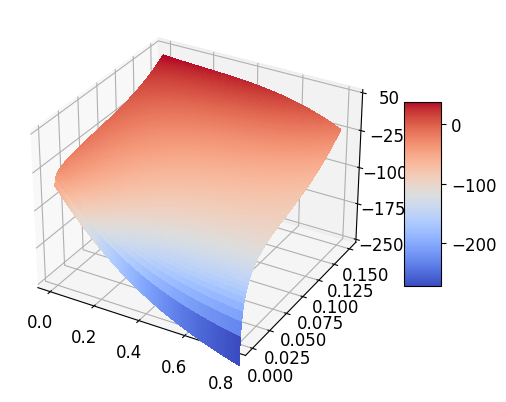

In [42]:
Y_e = np.linspace(1E-3,0.15,100).tolist(); 
Y_o = np.linspace(1E-3,0.80,100).tolist(); 
Y_o, Y_e = np.meshgrid(Y_o, Y_e)
delta_U = LJP_Two_Species(Y_o,Y_e)

fs=12
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(Y_o, Y_e, delta_U,rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=1, antialiased=False)

# Customize the z axis.
ax.set_zlim(-250,50)
ax.zaxis.set_major_locator(LinearLocator(5))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:1.f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

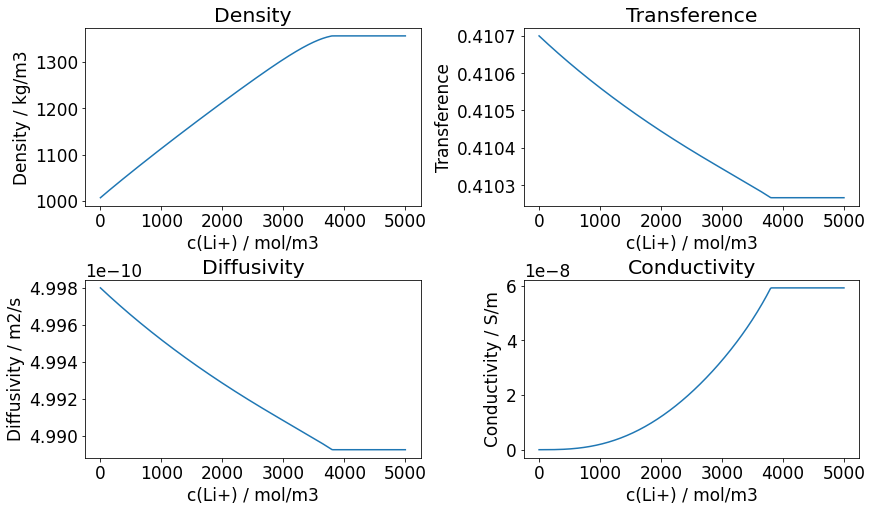

In [7]:

fs=17
font = {'family' : 'DejaVu Sans',
        'size'   : fs}
mpl.rc('font', **font)
C_e = np.linspace(1, 5000, 300).tolist(); c_EC = 6250; T=298.75
Rho = []; Diff = []; T_0plus=[]; Cond = [];
for c_e in C_e:
    Rho.append(Density_Andrew_ACS(c_e,c_EC, T))
    Diff.append(Diff_Andrew_ACS(c_e,c_EC, T))
    T_0plus.append(t_0plus_Andrew_ACS(c_e,c_EC, T))
    Cond.append(Cond_Andrew_ACS(c_e,c_EC, T))

fig, ax = plt.subplots(2,2,figsize=(12, 7), layout='constrained')
ax[0,0].plot(C_e,Rho,label='Coff=100')
ax[0,1].plot(C_e,T_0plus,label='Coff=500')
ax[1,0].plot(C_e,Diff,label='Coff=700')
ax[1,1].plot(C_e,Cond,label='Coff=1000')
ax[0,0].set_ylabel("Density / kg/m3")
ax[0,1].set_ylabel("Transference")
ax[1,0].set_ylabel("Diffusivity / m2/s")
ax[1,1].set_ylabel("Conductivity / S/m")
ax[0,0].set_title("Density")
ax[0,1].set_title("Transference")
ax[1,0].set_title("Diffusivity")
ax[1,1].set_title("Conductivity")

for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("c(Li+) / mol/m3")
    # 